TAHAP TAHAP CRISP DM

In [ ]:
• Bussiness Understanding
Minyak Bumi merupakan salah satu sumber daya alam yang berperan penting dalam kehidupan manusia, 
terutama digunakan sebagai bahan bakar yang dibutuhkan oleh seluruh lapisan masyarakat.
Konsumsi Bahan Bakar di Indonesia semakin meningkat, 
analisis dari pertamina pada tahun 2022, bbm meningkat 30% dari kondisi normal,
karena adanya masa mudik dan balik Lebaran. 
Disisi lain masyarakat sudah bergantung dengan bahan bakar, karena untuk kendaraan mereka.


Analisis ini dibuat untuk mengetahui prediksi peringkat konsumsi bahan bakar di Tahun 2022

Data ini didapatkan dasi kaggle "https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings"

Analisis ini dibuat untuk Melakukan pemetaan tingkat konsumsi Bahan Bakar


• Data understanding
Dengan tersedianya data mengenai bahan bakar, 
yang bermanfaat bagi masyarakat dan petugas  dalam tata kelola
distribusi bahan bakar bakar. Dan
Maka peringkat konsumsi bahan bakar di jalan bisa di analisis dengan data yang berpengaruh, seperti
kondisi jalan raya seperti asap, kondisi sitem transportasinya.

Di dataset ini terdapat data

Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),
Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating


• Data preparation
Pada kali ini kita menganalisis lebih lanjut data apa saja yang sudah kita gunakan
karena memakai regresi linear data yang dibutuhkan hanya yang bersifat numerik

maka ditentukannya data sebagai berikut :

EngineSize              946 non-null    float64
Cylinders               946 non-null    int64  
FuelConsumptionCity     946 non-null    float64
FuelConsumptionHwy      946 non-null    float64
FuelConsumptionCombKM   946 non-null    float64
FuelConsumptionCombMPG  946 non-null    int64  
CO2Emissions            946 non-null    int64  
CO2Rating               946 non-null    int64  
SmogRating              946 non-null    int64

Setelah data disesuaikan dengan kebutuhan, maka di seleksi
dan menghasilkan x(fitur) dan y(label)

fitur(x) : EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity,
           FuelConsumptionHwy,FuelConsumptionCombMPG,CO2Emissions,CO2Rating,SmogRating
label(y) : FuelConsumptionCombKM
 

• Modelling
Memakai model algoritma regresi linear

• Evaluation 
Pada tahapan evaluasi ini kita bertujuan kuntuk melakukan evaluasi
setelah data diterapkan pada model maka, kita akan memprediksi tingka akurasi
Tingkat akurasi pada analisis ini menghasilkan 99%. 
Analisis prediksi ini bisa dipakai karena tingkat akurasinya besar yang artinya bisa dipercaya. 

• Deployment
Ketika semua tahapan sudah di uji dan di pastikan sesuai model, maka model di import
Di upload github, dan di deploy di streamlit.
Selesai

# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [12]:
df = pd.read_csv('MY2022Fuel.csv')

# Deskripsi Dataset

In [13]:
df.head()

,ModelYear,Make,Model,Vehicle Class,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionCombKM,FuelConsumptionCombMPG,CO2Emissions,CO2Rating,SmogRating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ModelYear               946 non-null    int64  
 1   Make                    946 non-null    object 
 2   Model                   946 non-null    object 
 3   Vehicle Class           946 non-null    object 
 4   EngineSize              946 non-null    float64
 5   Cylinders               946 non-null    int64  
 6   Transmission            946 non-null    object 
 7   FuelType                946 non-null    object 
 8   FuelConsumptionCity     946 non-null    float64
 9   FuelConsumptionHwy      946 non-null    float64
 10  FuelConsumptionCombKM   946 non-null    float64
 11  FuelConsumptionCombMPG  946 non-null    int64  
 12  CO2Emissions            946 non-null    int64  
 13  CO2Rating               946 non-null    int64  
 14  SmogRating              946 non-null    in

<Axes: >

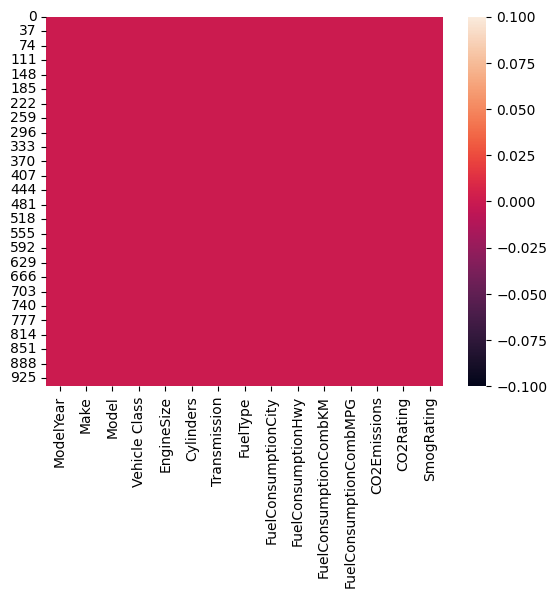

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.describe()

,ModelYear,EngineSize,Cylinders,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionCombKM,FuelConsumptionCombMPG,CO2Emissions,CO2Rating,SmogRating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_9012\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

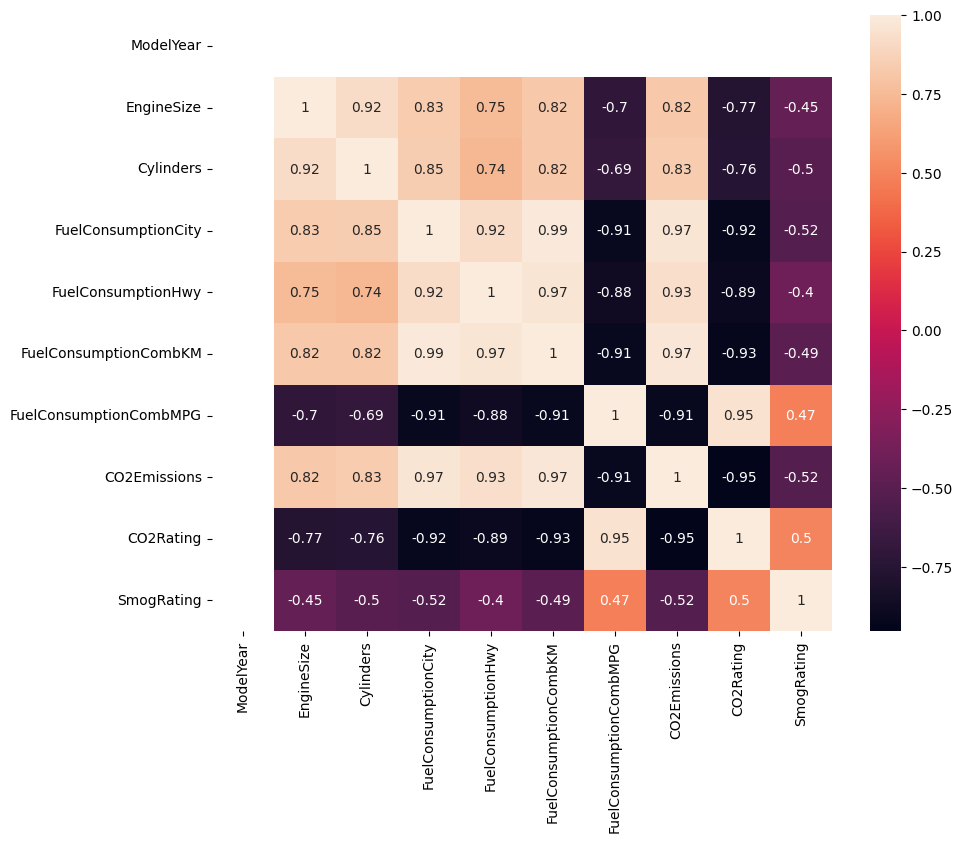

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Cylinders berdasarkan Model

In [8]:
category = df.groupby('Model').count()[['Cylinders']].sort_values(by='Cylinders',ascending=True).reset_index()
category = category.rename(columns={'Cylinders':'CategoryCylinders'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

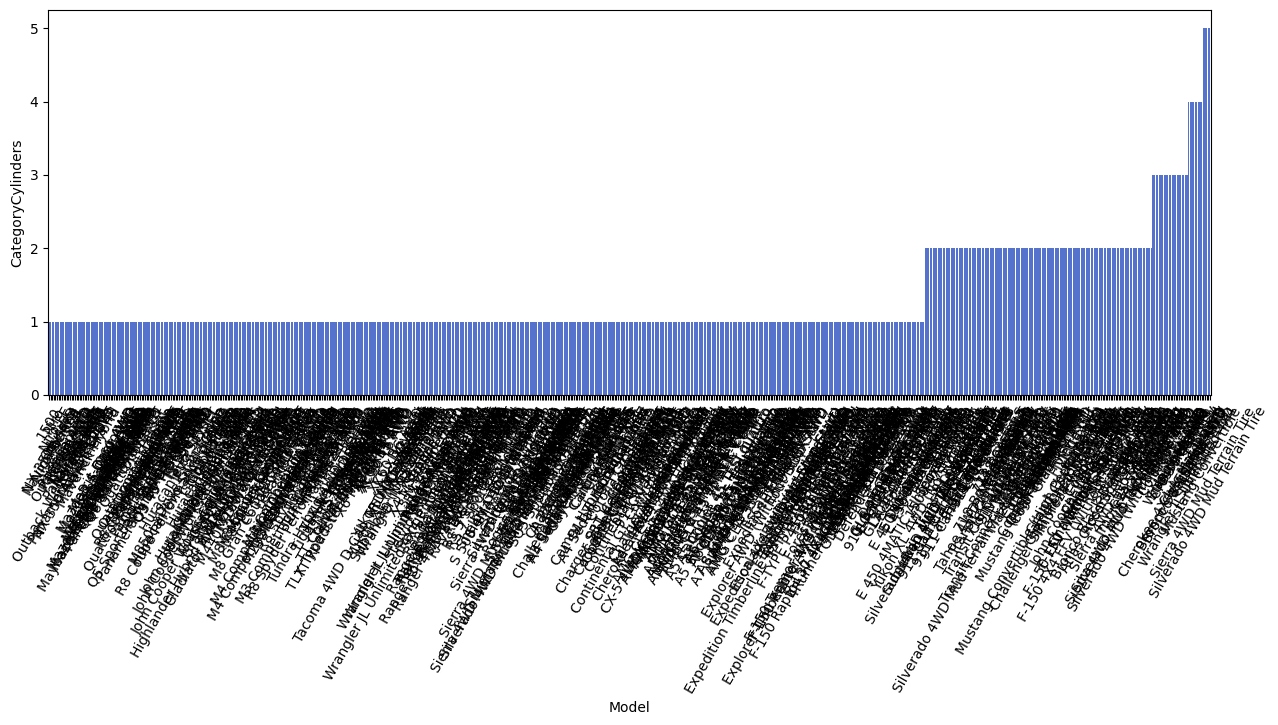

In [18]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=category['Model'], y=category['CategoryCylinders'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Smog Rating

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_9012\311171521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SmogRating'])


<Axes: xlabel='SmogRating', ylabel='Density'>

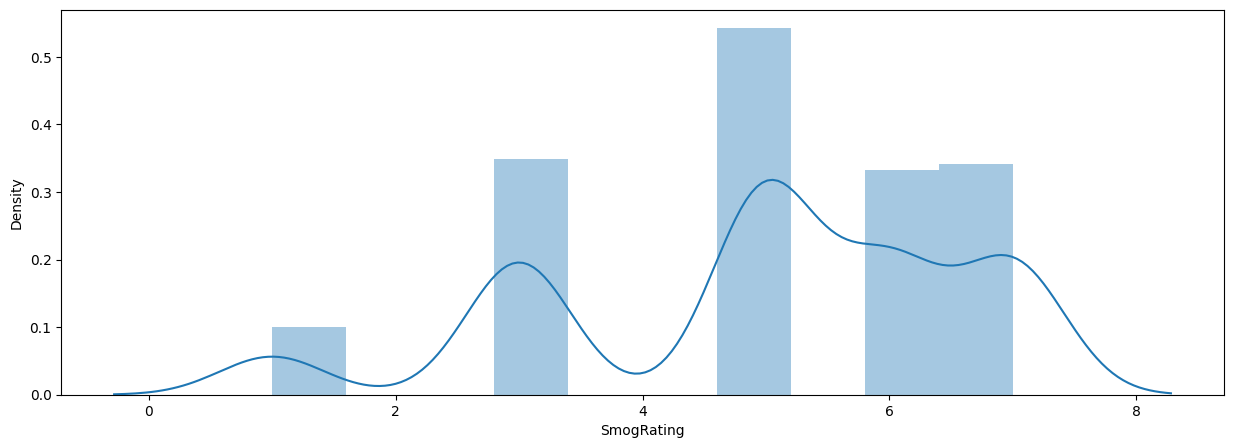

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['SmogRating'])

# distribusi Konsusmsi Bahan Bakar(Comb (L/100 km))

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_7540\2070197214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

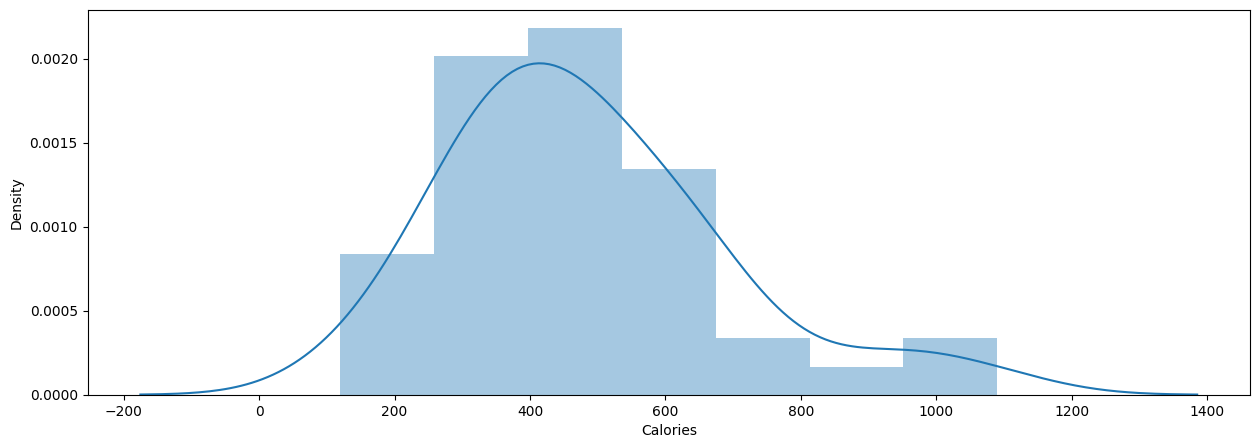

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['FuelConsumptionCombKM'])

# seleksi fitur

In [20]:
features = ['EngineSize','Cylinders','FuelConsumptionCity','FuelConsumptionHwy','FuelConsumptionCombMPG','CO2Emissions','CO2Rating','SmogRating']
x = df[features]
y = df['FuelConsumptionCombKM']
x.shape, y.shape

((946, 8), (946,))

# split data training dan data testing

In [21]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(237,)

# membuat model regresi linier

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [23]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9998573834454729


# membuat inputan model regresi linier

In [25]:
input_data = np.array([[2.4,4,9.9,7,33,200,6,3]])

prediction = lr.predict(input_data) 
print('Estimasi Peringkat Konsumsi bahan bakar :', prediction)
#calories = 950

Estimasi Peringkat Konsumsi bahan bakar : [8.60174751]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [26]:
import pickle

filename = 'estimasi_fuel.sav'
pickle.dump(lr,open(filename,'wb'))